<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/29Aug2025LinearLineNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn


In [35]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
#y=np.sin(X)

In [36]:
X.shape

torch.Size([50, 1])

In [37]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

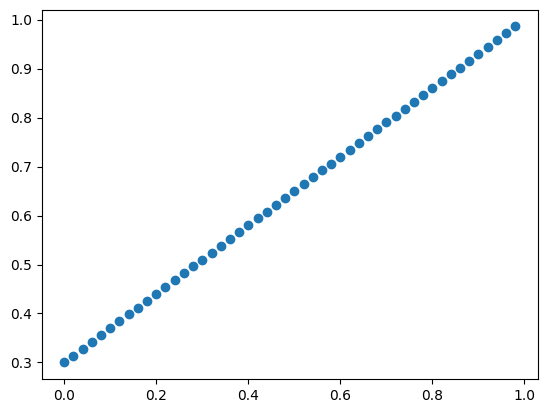

In [38]:
#plot X, y
plt.scatter(X,y)
plt.show()

In [39]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [42]:
# Split , Train

# manual without shuffling
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



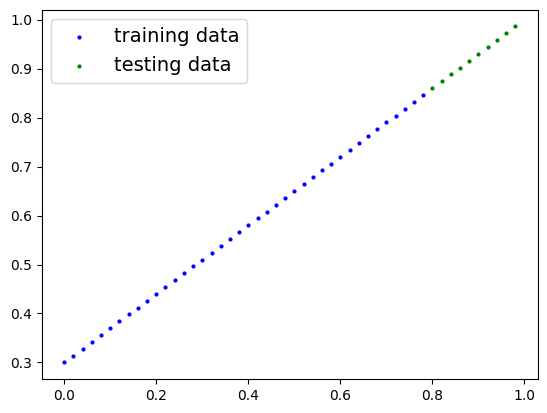

In [48]:
# plot the data

plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.legend(prop={"size": 14})
plt.show()

In [47]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias= nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


In [51]:
# get the loss function

torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

next(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
# make prediction with model

with torch.inference_mode():
    y_preds = model_0(X_test)

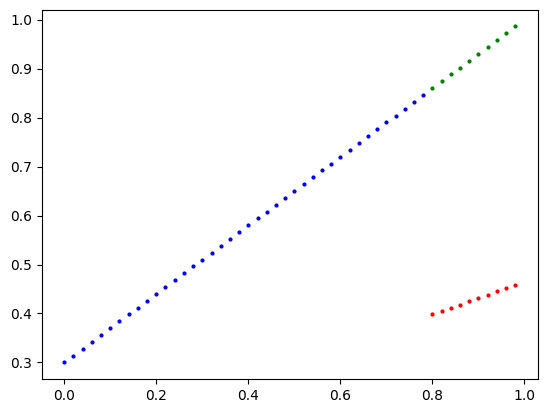

In [61]:
# plot predicted data

plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.scatter(X_test, y_preds, c="r", s=4, label="testing data")


In [64]:
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01 )   # lr === learning rate

In [68]:
epochs = 100



for epoch in range(epochs):
    model_0.train()

    #forward path

    y_pred = model_0(X_train)

    #calculate loss
    loss = loss_fn(y_pred, y_train)

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #optimizer step
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | MEA Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 10 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 20 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 30 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 40 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 50 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 60 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 70 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 80 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 90 | MEA Loss: 0.008932482451200485 | Test loss: 0.005023092031478882


In [ ]:
# make the elbo plot




